# GEX (Gamma Exposure) Example

This notebook demonstrates how to use the GEX class to visualize gamma exposure from SPX option chain data.

In [1]:
import sys
sys.path.insert(0, '../src')

from trade_lab.charts import GEX
import pandas as pd

## Load Data

First, fetch option chain data using the Ruby script:

```bash
bundle exec ruby bin/fetch_spx_option_chains
```

This will create CSV files in the `data/` directory.

In [2]:
# Example: Load data from CSV file
# Replace with your actual date
date = "2025-12-18"
csv_path = f"../data/SPX_{date}.csv"

# Create GEX chart instance
gex = GEX(csv_path=csv_path)

## Plot Gamma Exposure

Generate the GEX chart with a specific strike range.

Strike range: 6650–6950
Total Call Gamma Exposure: 264,456,960
Total Put Gamma Exposure:  132,731,762
Zero Gamma Level: ≈ 6655.0


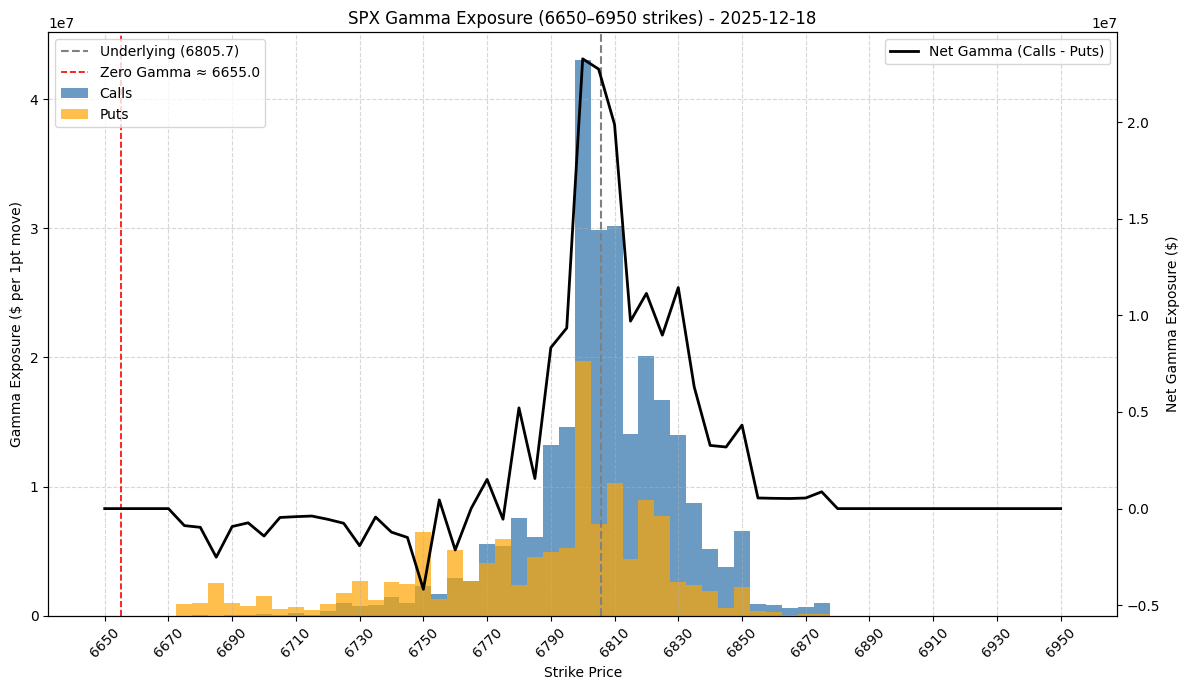

In [5]:
# Plot GEX for a specific strike range
min_strike = 6650
max_strike = 6950

fig, axes = gex.plot(
    min_strike=min_strike,
    max_strike=max_strike,
    date=date,
    figsize=(12, 7)
)

## Calculate GEX Data

You can also access the calculated GEX data directly for further analysis.

In [6]:
# Get GEX data by strike
gex_data = gex.calculate_gex_by_strike(min_strike=min_strike, max_strike=max_strike)

# Display the data
print(gex_data.head())

# Find zero gamma level
zero_gamma = gex.find_zero_gamma_level(gex_data)
if zero_gamma:
    print(f"\nZero Gamma Level: {zero_gamma:.2f}")

contract_type  strike  CALL  PUT  net_gamma
109            6650.0   0.0  0.0        0.0
110            6655.0   0.0  0.0        0.0
111            6660.0   0.0  0.0        0.0
112            6665.0   0.0  0.0        0.0
113            6670.0   0.0  0.0        0.0

Zero Gamma Level: 6655.00


## Alternative: Load from DataFrame

You can also initialize the GEX class with a pandas DataFrame directly.

In [ ]:
# Load data into DataFrame first
df = pd.read_csv(csv_path)

# Filter or modify data as needed
# df = df[df['expiration_date'] == '2025-12-20']

# Create GEX instance from DataFrame
gex2 = GEX(dataframe=df)
gex2.plot(min_strike=5900, max_strike=6000)